importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data Preproceesing

In [2]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
pd.set_option('max_colwidth', 256)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


determing the correlation of SalePrice with other variables

**Correlation** is a statistical technique that can show whether and how strongly pairs of variables are related

In [5]:
corr = df.corr()
top_feature = corr[abs(corr['SalePrice']>0.5)]
top_feature['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

**Visualizing the Data**

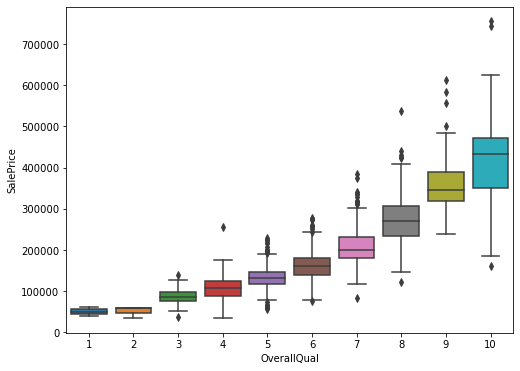

In [6]:
var = 'OverallQual'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

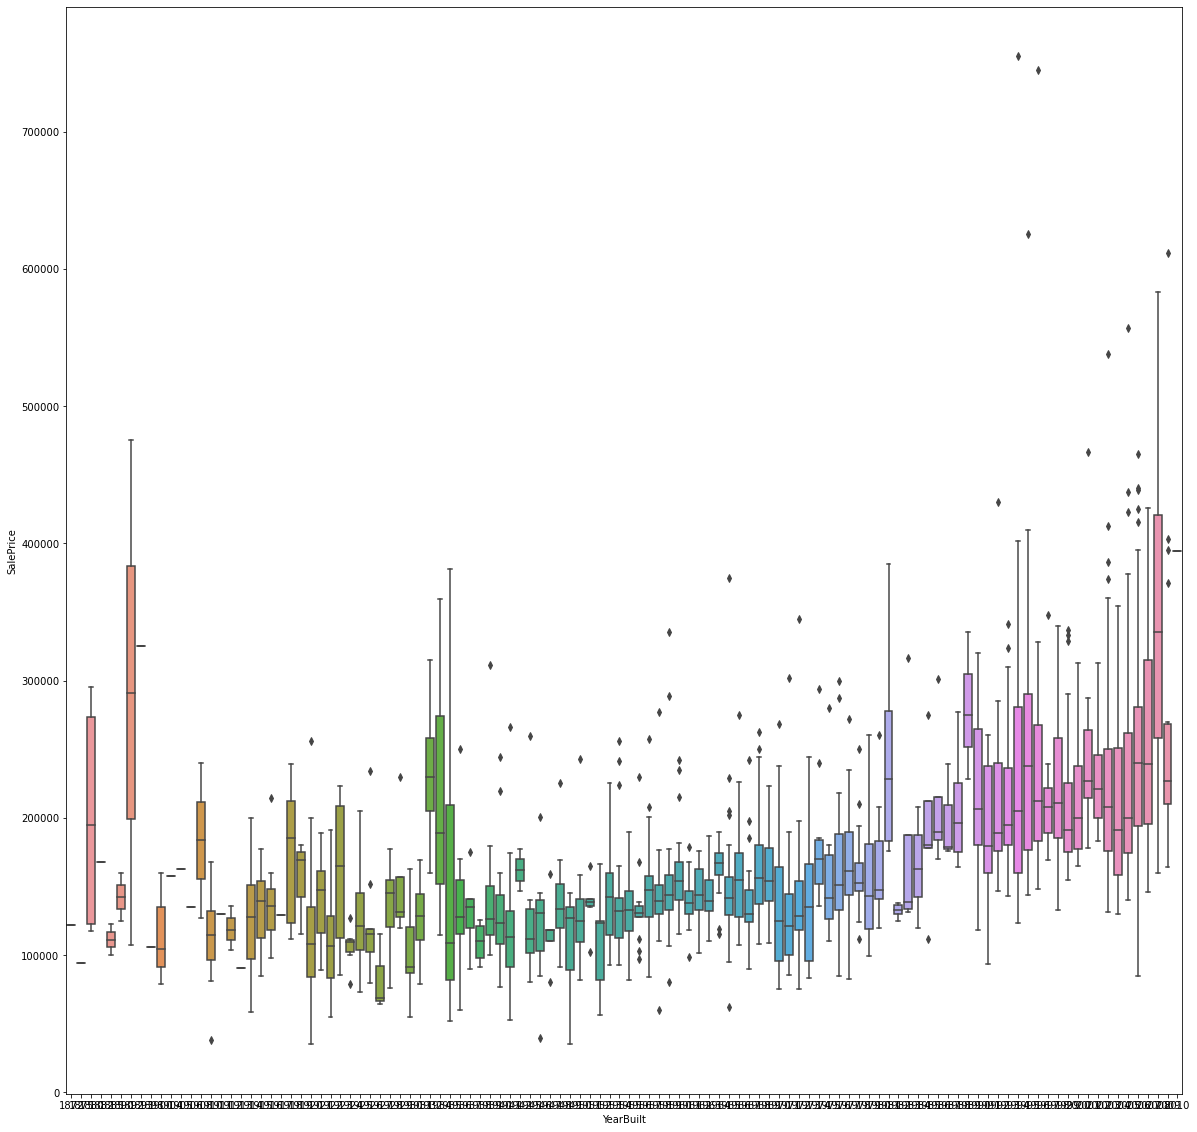

In [7]:
var = 'YearBuilt'
f, ax = plt.subplots(figsize=(20,20))
fig = sns.boxplot(x=var, y="SalePrice", data=df)

In [8]:
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find most important features relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

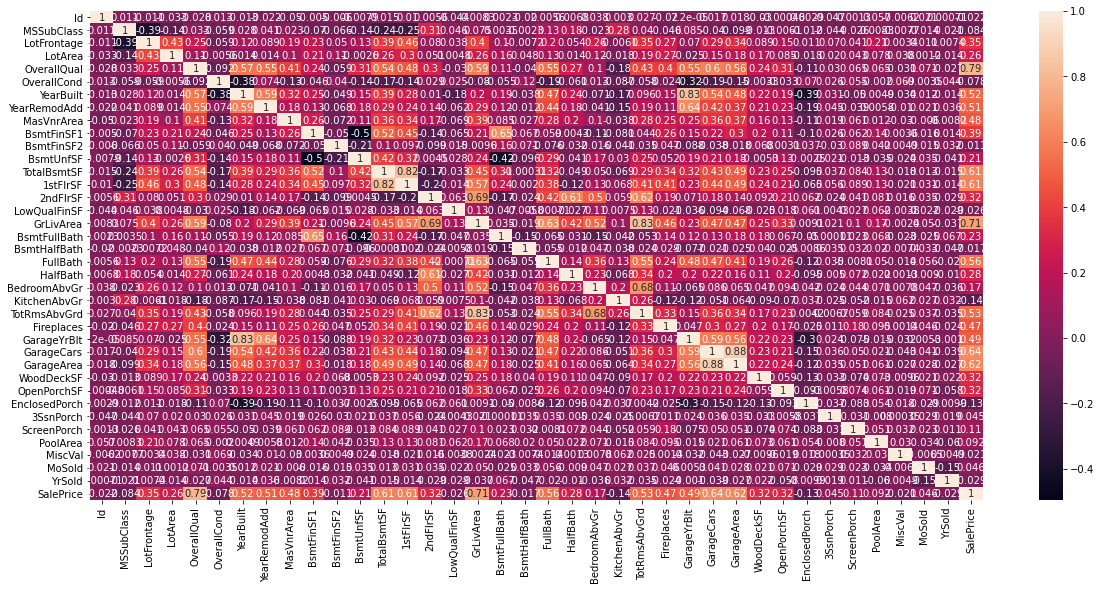

In [9]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

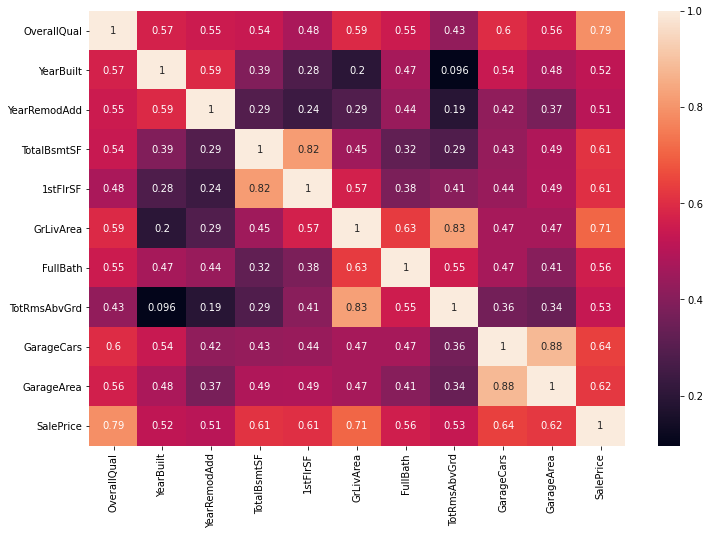

In [10]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

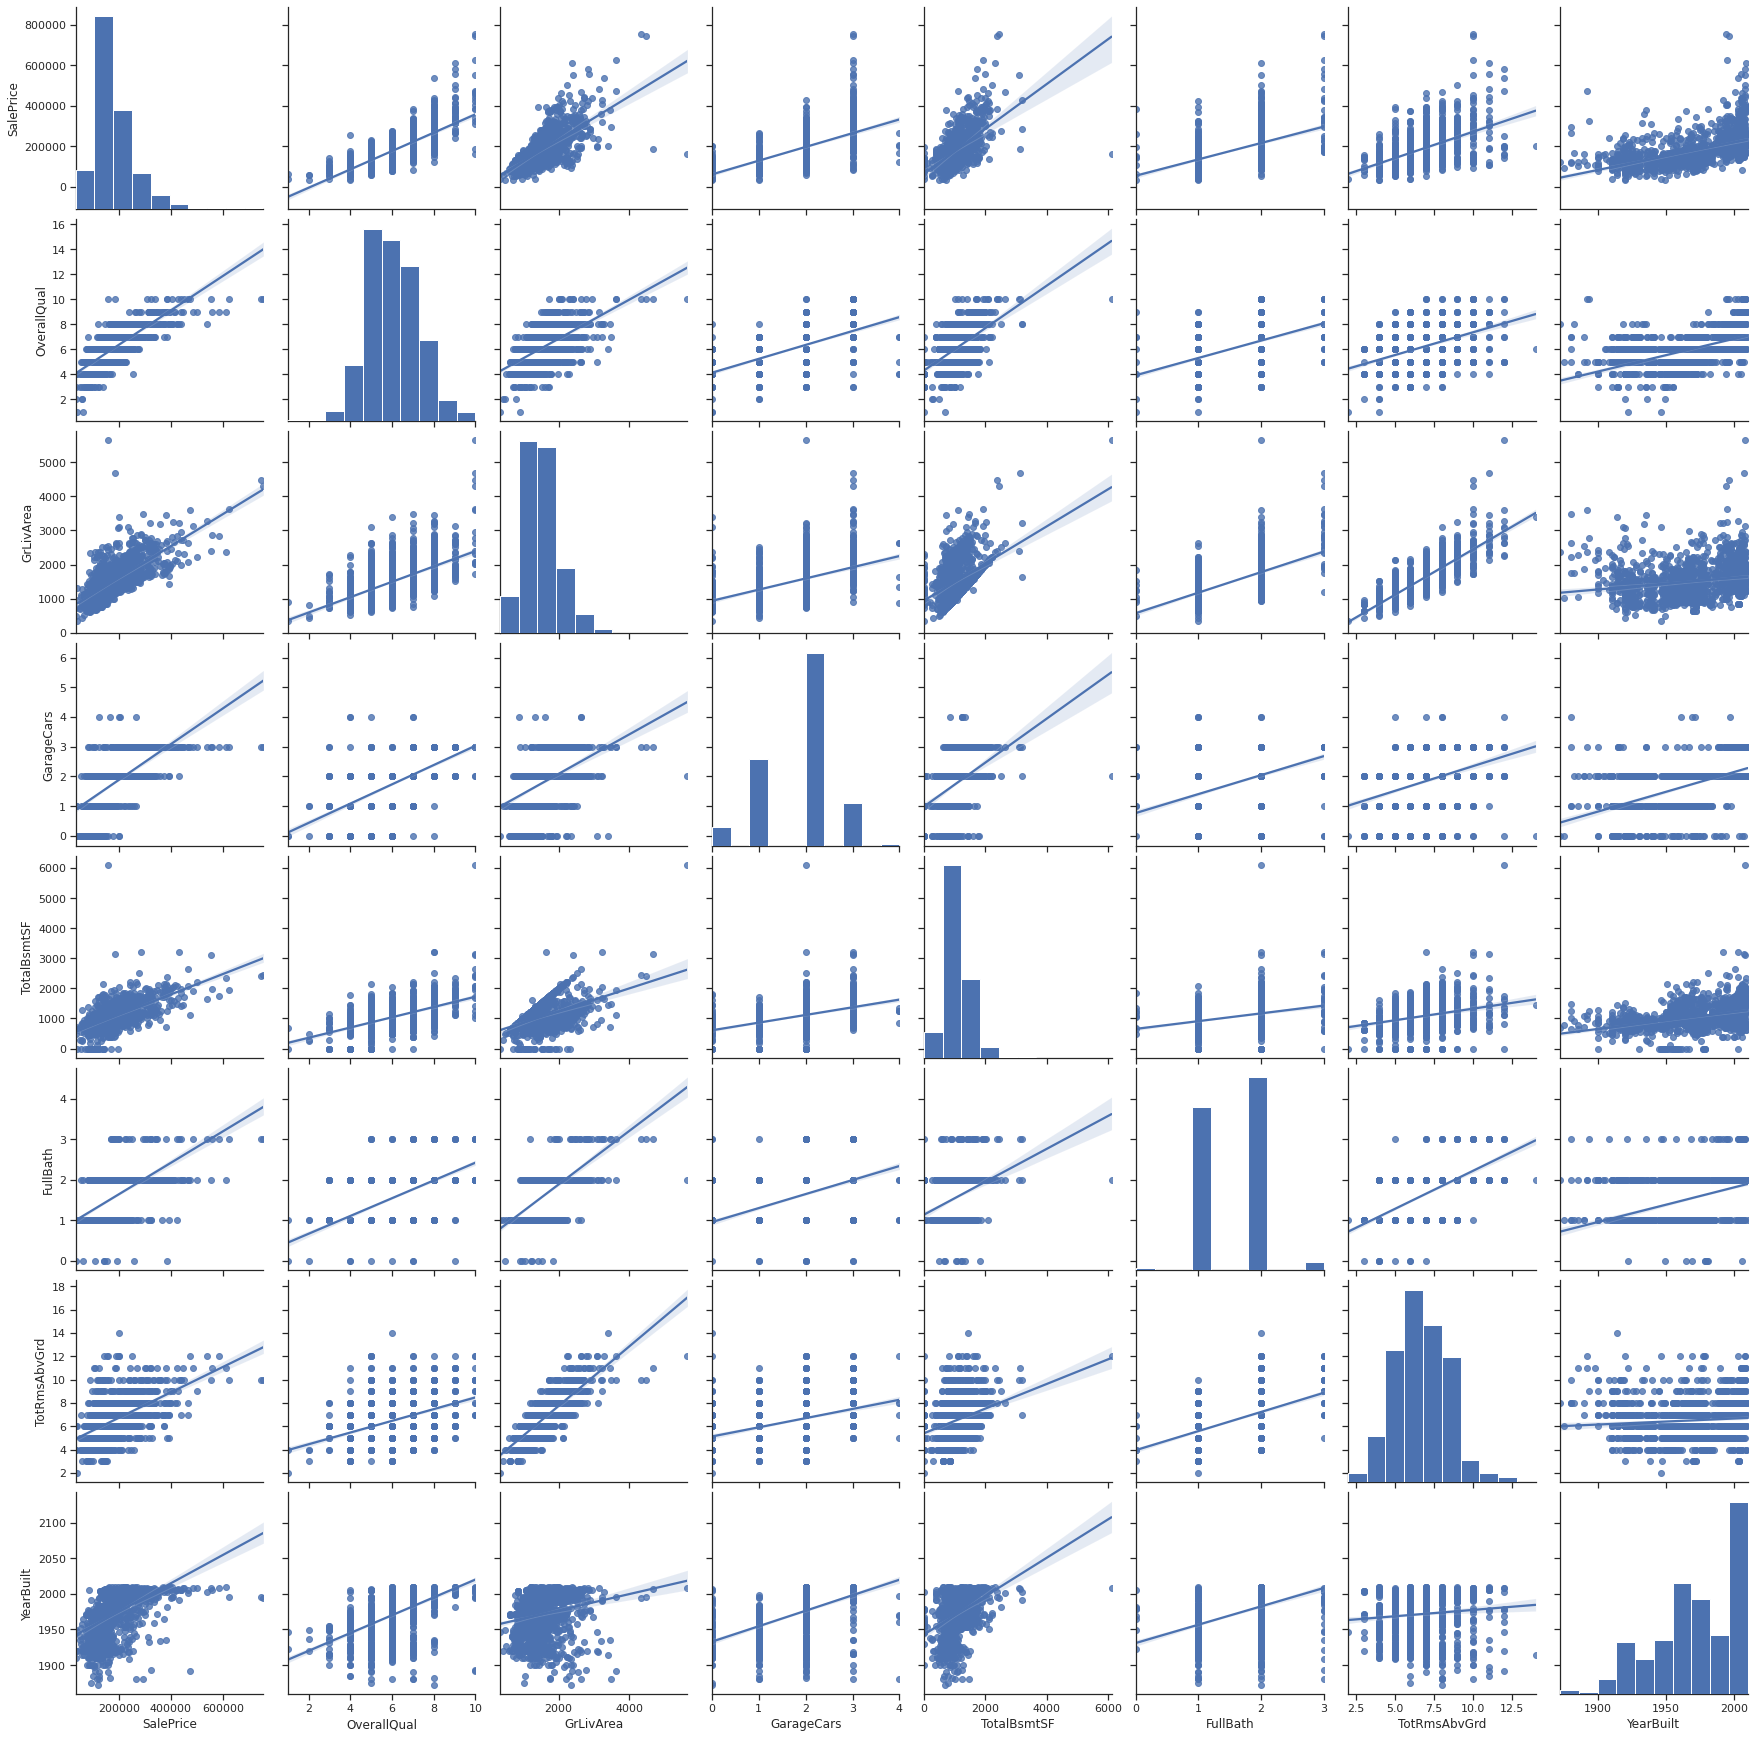

In [11]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(df[col], height=3, kind='reg')

**Data Cleaning Steps**

In [12]:
df.isnull().sum().sort_values(ascending= False)[:15]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
dtype: int64

In [13]:
df['LotFrontage'] =df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [14]:
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [15]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [16]:
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [17]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0])
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0])
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mode()[0])
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mean())
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [18]:
df.drop(['Id'],inplace= True,axis=1)

In [19]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [20]:
df.isnull().sum().sort_values(ascending= False)[:15]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
SalePrice         0
ExterCond         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
BsmtCond          0
dtype: int64

In [21]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols
col_list = list(set(cols) - set(num_cols))
col_list

['BsmtFinType1',
 'MasVnrType',
 'Fence',
 'LandSlope',
 'PavedDrive',
 'Electrical',
 'MiscFeature',
 'GarageFinish',
 'GarageCond',
 'Street',
 'BsmtFinType2',
 'BsmtExposure',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Heating',
 'SaleCondition',
 'Condition2',
 'Exterior1st',
 'Neighborhood',
 'HouseStyle',
 'BsmtQual',
 'GarageQual',
 'LandContour',
 'Exterior2nd',
 'ExterQual',
 'GarageType',
 'KitchenQual',
 'BldgType',
 'RoofMatl',
 'HeatingQC',
 'CentralAir',
 'Condition1',
 'Functional',
 'SaleType',
 'BsmtCond',
 'RoofStyle',
 'Alley',
 'FireplaceQu',
 'Utilities',
 'PoolQC',
 'Foundation',
 'ExterCond']

In [22]:
y = df.iloc[:, -1].values

In [23]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [24]:
df1 = df.copy()

In [25]:
df1 = pd.get_dummies(df, columns = ['GarageCond',
 'BsmtExposure',
 'BldgType',
 'GarageQual',
 'KitchenQual',
 'Condition1',
 'Electrical',
 'LotShape',
 'LandSlope',
 'BsmtCond',
 'LotConfig',
 'BsmtFinType2',
 'CentralAir',
 'Neighborhood',
 'HouseStyle',
 'MasVnrType',
 'PavedDrive',
 'SaleType',
 'Condition2',
 'LandContour',
 'ExterQual',
 'HeatingQC',
 'BsmtFinType1',
 'Functional',
 'GarageType',
 'Utilities',
 'GarageFinish',
 'RoofMatl',
 'Exterior1st',
 'BsmtQual',
 'RoofStyle',
 'Heating',
 'Street',
 'ExterCond',
 'Foundation',
 'Exterior2nd',
 'SaleCondition',
 'MSZoning'], drop_first = True)

In [26]:
df1.head()

,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Mod,LandSlope_Sev,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,LandContour_HLS,LandContour_Low,LandContour_Lvl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Utilities_NoSeWa,GarageFinish_RFn,GarageFinish_Unf,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,NaN,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,NaN,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
col = df1.pop("SalePrice")

In [28]:
df1

,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandSlope_Mod,LandSlope_Sev,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,CentralAir_Y,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,LandContour_HLS,LandContour_Low,LandContour_Lvl,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Utilities_NoSeWa,GarageFinish_RFn,GarageFinish_Unf,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Street_Pave,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,65.0,8450,NaN,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,NaN,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [29]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [30]:
df2 = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [31]:
df3 = df2.copy()

In [32]:
df2.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','GarageYrBlt'],axis=1,inplace=True)

In [33]:
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].mean())

In [34]:
df2['GarageType'] = df2['GarageType'].fillna(df2['GarageType'].mode()[0])

In [35]:
df2['GarageFinish'] = df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])

In [36]:
df2['MSZoning'] = df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])

In [37]:
df2['BsmtQual'] = df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])

In [38]:
df2['BsmtCond'] = df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0])

In [39]:
df2['BsmtExposure'] = df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0])

In [40]:
df2['KitchenQual'] = df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0])
df2['Functional'] = df2['Functional'].fillna(df2['Functional'].mode()[0])
df2['GarageQual'] = df2['GarageQual'].fillna(df2['GarageQual'].mode()[0])
df2['GarageCond'] = df2['GarageCond'].fillna(df2['GarageCond'].mode()[0])
df2['GarageCars'] = df2['GarageCars'].fillna(df2['GarageCars'].mode()[0])
df2['GarageArea'] = df2['GarageArea'].fillna(df2['GarageArea'].mean())
df2['SaleType'] = df2['SaleType'].fillna(df2['SaleType'].mode()[0])

In [41]:
df2['BsmtFinType1'] = df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['BsmtFinSF1'] = df2['BsmtFinSF1'].fillna(df2['BsmtFinSF1'].mode()[0])
df2['BsmtFinSF2'] = df2['BsmtFinSF2'].fillna(df2['BsmtFinSF2'].mode()[0])
df2['BsmtFinType2'] = df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0])
df2['Exterior1st'] = df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0])
df2['Exterior2nd'] = df2['Exterior2nd'].fillna(df2['Exterior2nd'].mode()[0])
df2['BsmtUnfSF'] = df2['BsmtUnfSF'].fillna(df2['BsmtUnfSF'].mode()[0])
df2['TotalBsmtSF'] = df2['TotalBsmtSF'].fillna(df2['TotalBsmtSF'].mode()[0])
df2['BsmtHalfBath'] = df2['BsmtHalfBath'].fillna(df2['BsmtHalfBath'].mode()[0])
df2['BsmtFullBath'] = df2['BsmtFullBath'].fillna(df2['BsmtFullBath'].mode()[0])

In [42]:
df2['Utilities'] = df2['Utilities'].fillna(df2['Utilities'].mode()[0])
df2['MasVnrType'] = df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])
df2['MasVnrArea'] = df2['MasVnrArea'].fillna(df2['MasVnrArea'].mode()[0])

In [43]:
ID = df2['Id']
df2.drop(['Id'],axis=1,inplace=True)

In [44]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


In [45]:
cols = df2.columns
num_cols = df2._get_numeric_data().columns
num_cols
col_list1 = list(set(cols) - set(num_cols))
col_list1

['BsmtFinType1',
 'MasVnrType',
 'LandSlope',
 'Electrical',
 'PavedDrive',
 'GarageFinish',
 'GarageCond',
 'Street',
 'BsmtFinType2',
 'MSZoning',
 'BsmtExposure',
 'LotShape',
 'LotConfig',
 'Condition2',
 'Heating',
 'SaleCondition',
 'HouseStyle',
 'Neighborhood',
 'Exterior1st',
 'BsmtQual',
 'GarageQual',
 'LandContour',
 'Exterior2nd',
 'ExterQual',
 'GarageType',
 'KitchenQual',
 'BldgType',
 'RoofMatl',
 'HeatingQC',
 'CentralAir',
 'Condition1',
 'Functional',
 'SaleType',
 'BsmtCond',
 'RoofStyle',
 'Utilities',
 'Foundation',
 'ExterCond']

In [46]:
df3 = pd.get_dummies(df2, columns = ['Street',
 'Neighborhood',
 'LotShape',
 'RoofMatl',
 'Heating',
 'BsmtExposure',
 'BsmtCond',
 'ExterCond',
 'Electrical',
 'RoofStyle',
 'Condition2',
 'SaleCondition',
 'LotConfig',
 'KitchenQual',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'Utilities',
 'GarageQual',
 'Exterior1st',
 'GarageCond',
 'Exterior2nd',
 'Functional',
 'LandSlope',
 'BsmtFinType2',
 'BsmtFinType1',
 'ExterQual',
 'BldgType',
 'BsmtQual',
 'CentralAir',
 'LandContour',
 'Condition1',
 'MSZoning',
 'MasVnrType',
 'GarageType',
 'Foundation',
 'HeatingQC',
 'HouseStyle']
, drop_first = True)

In [47]:
for i in df1.columns:
    if i not in df3.columns:
        df1.drop({i},axis= 1, inplace= True)
        
for i in df3.columns:
    if i not in df1.columns:
        df3.drop({i},axis= 1, inplace= True)

In [48]:
X = df1.iloc[:].values
X_test = df3.iloc[:].values

In [49]:
X.shape

(1460, 215)

In [50]:
X_test.shape

(1459, 215)

**fitting Predicting the values of test results using Random Forest Regression Algorithm**

**Random Forest algorithm**

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(X, y)

RandomForestRegressor()

**Predicting the results**

In [55]:
predrd = regressor.predict(X_test)
predrd

array([120048.2 , 143636.02, 173941.11, ..., 154547.93, 109717.36,
       234867.31])